# Sheet 3

Johannes van de Locht, Finn Kalvelage, Anna Beckers

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import umap
import random


## Task 2

### a) On Sheet 3, we investigated the effect of data standardization on PCA. Will standardizing the input of t-SNE and UMAP also affect the resulting embeddings? Justify your answer. (2P)

As we have the same scales for our four attributes the standardization should not matter too much as the embeddings are based on k-nearest neigbours. The calculation of the nearest neigbour graphs are based on distances but arent directly correlated and therefore shouldnt be impacted as much.

### b) Experimentally confirm your answer by plotting the iris dataset with t-SNE and UMAP with default settings, respectively, both without and with standardization. Use different colors for each species and an equal aspect ratio to avoid distorting the plots. (2P)

In [34]:
def plot(
    top_left,
    top_left_name,
    top_right,
    top_right_name,
    bottom_left,
    bottom_left_name,
    bottom_right,
    bottom_right_name,
    xlim=(-30, 30),
    ylim=(-20, 20),
):
    # Create Figure
    _, axes = plt.subplots(2, 2, figsize=(16, 6))

    axs = axes.flatten()

    # Add top left plot
    sns.scatterplot(
        top_left, x=top_left.columns[0], y=top_left.columns[1], ax=axs[0], hue="class"
    )
    # Set aspect ration to be equal
    axs[0].set_aspect("equal", adjustable="box")
    axs[0].set_title(top_left_name)

    # Set limits to be equal for all plots
    axs[0].set_xlim(xlim)
    axs[0].set_ylim(ylim)

    # Add top right plot
    sns.scatterplot(
        top_right,
        x=top_right.columns[0],
        y=top_right.columns[1],
        ax=axs[1],
        hue="class",
    )
    # Set aspect ration to be equal
    axs[1].set_aspect("equal", adjustable="box")
    axs[1].set_title(top_right_name)

    # Set limits to be equal for all plots
    axs[1].set_xlim(xlim)
    axs[1].set_ylim(ylim)

    # Add bottom left plot
    sns.scatterplot(
        bottom_left,
        x=bottom_left.columns[0],
        y=bottom_left.columns[1],
        ax=axs[2],
        hue="class",
    )
    # Set aspect ration to be equal
    axs[2].set_aspect("equal", adjustable="box")
    axs[2].set_title(bottom_left_name)

    # Set limits to be equal for all plots
    axs[2].set_xlim(xlim)
    axs[2].set_ylim(ylim)

    # Add bottom right plot
    sns.scatterplot(
        bottom_right,
        x=bottom_right.columns[0],
        y=bottom_right.columns[1],
        ax=axs[3],
        hue="class",
    )
    # Set aspect ration to be equal
    axs[3].set_aspect("equal", adjustable="box")
    axs[3].set_title(bottom_right_name)

    # Set limits to be equal for all plots
    axs[3].set_xlim(xlim)
    axs[3].set_ylim(ylim)

    plt.tight_layout()
    plt.show()


In [35]:
# Load and normalize data
dataset = load_iris()
df = dataset.data
df_standardized = (df - df.mean()) / df.std()

# fit tsne
tsne_iris = TSNE().fit_transform(df)
tsne_iris_standardized = TSNE().fit_transform(df_standardized)

# convert to df and add cluster information
tsne_iris = pd.DataFrame(tsne_iris)
tsne_iris["class"] = dataset.target
tsne_iris_standardized = pd.DataFrame(tsne_iris_standardized)
tsne_iris_standardized["class"] = dataset.target

# fit umap
umap_iris = umap.UMAP().fit_transform(df)
umap_iris_standardized = umap.UMAP().fit_transform(df_standardized)

# convert to df and add cluster information
umap_iris = pd.DataFrame(umap_iris)
umap_iris["class"] = dataset.target
umap_iris_standardized = pd.DataFrame(umap_iris_standardized)
umap_iris_standardized["class"] = dataset.target


d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


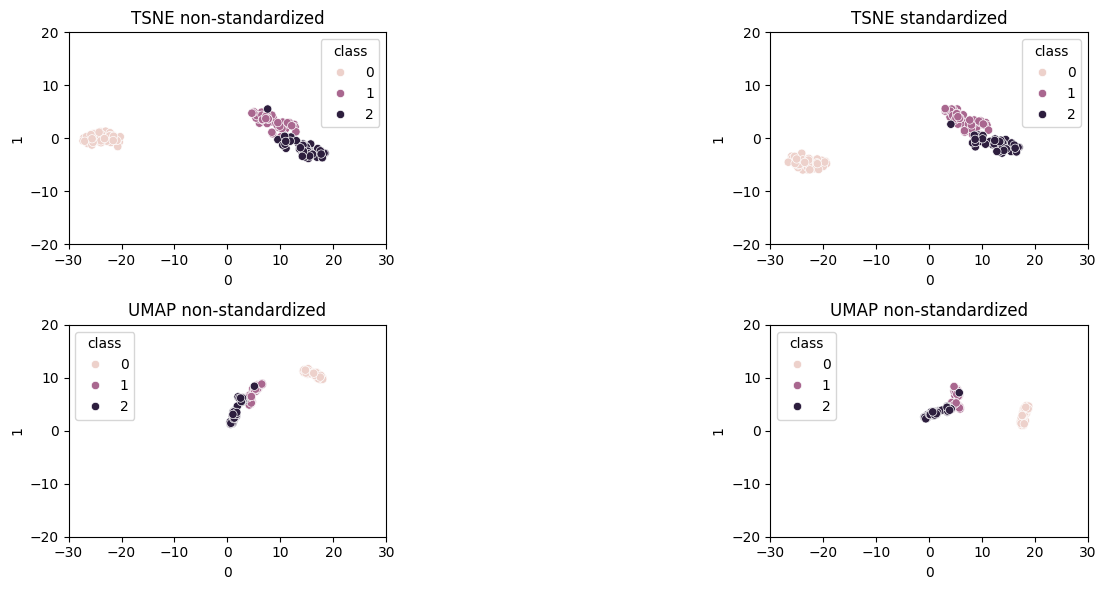

In [36]:
plot(
    tsne_iris,
    "TSNE non-standardized",
    tsne_iris_standardized,
    "TSNE standardized",
    umap_iris,
    "UMAP non-standardized",
    umap_iris_standardized,
    "UMAP non-standardized",
)


### c) In the lecture, we discussed the relevance of initialization in t-SNE and UMAP. Run both methods on the standardized data with multiple random initializations, keeping track of the seed to keep your results reproducible. Comment on the resulting variability. Could it affect the interpretation of the plots? (3P)

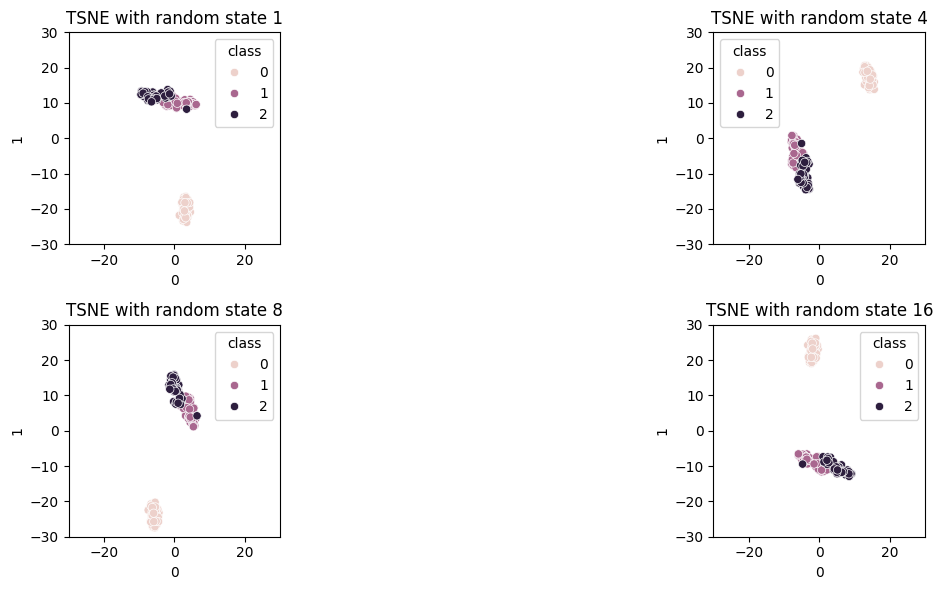

In [37]:
tsne_iris_standardized_a = TSNE(init="random", random_state=2).fit_transform(
    df_standardized
)

tsne_iris_standardized_a = pd.DataFrame(tsne_iris_standardized_a)
tsne_iris_standardized_a["class"] = dataset.target

tsne_iris_standardized_b = TSNE(init="random", random_state=4).fit_transform(
    df_standardized
)

tsne_iris_standardized_b = pd.DataFrame(tsne_iris_standardized_b)
tsne_iris_standardized_b["class"] = dataset.target

tsne_iris_standardized_c = TSNE(init="random", random_state=8).fit_transform(
    df_standardized
)

tsne_iris_standardized_c = pd.DataFrame(tsne_iris_standardized_c)
tsne_iris_standardized_c["class"] = dataset.target

tsne_iris_standardized_d = TSNE(init="random", random_state=26).fit_transform(
    df_standardized
)

tsne_iris_standardized_d = pd.DataFrame(tsne_iris_standardized_d)
tsne_iris_standardized_d["class"] = dataset.target

plot(
    tsne_iris_standardized_a,
    "TSNE with random state 1",
    tsne_iris_standardized_b,
    "TSNE with random state 4",
    tsne_iris_standardized_c,
    "TSNE with random state 8",
    tsne_iris_standardized_d,
    "TSNE with random state 16",
    (-30, 30),
    (-30, 30),
)


There is almost no variability inside the clusters and their relative positioning. The absolute positioning in the figure changes based on the random initialization.

d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state.

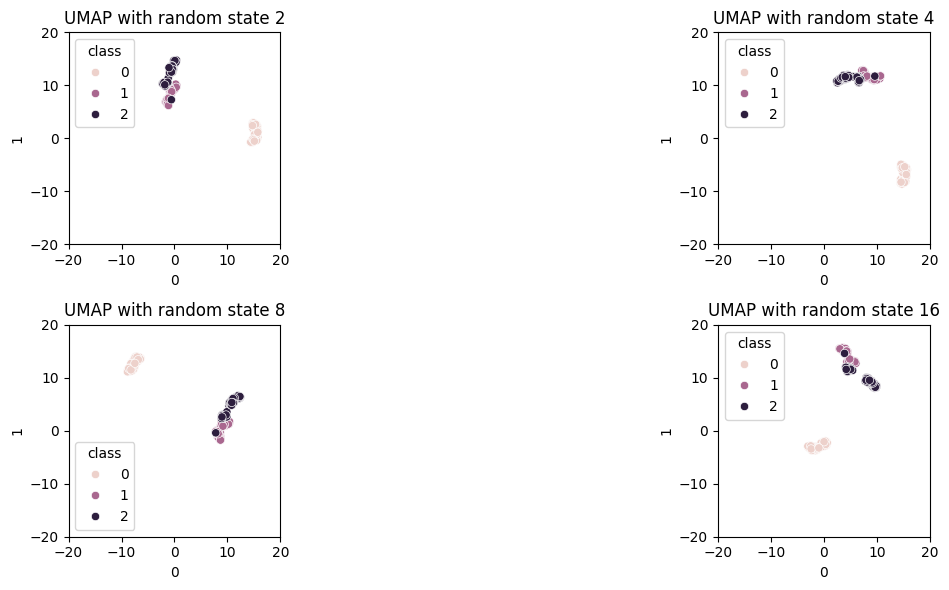

In [38]:
tsne_iris_standardized_a = umap.UMAP(init="random", random_state=2).fit_transform(
    df_standardized
)


tsne_iris_standardized_a = pd.DataFrame(tsne_iris_standardized_a)
tsne_iris_standardized_a["class"] = dataset.target

tsne_iris_standardized_b = umap.UMAP(init="random", random_state=4).fit_transform(
    df_standardized
)

tsne_iris_standardized_b = pd.DataFrame(tsne_iris_standardized_b)
tsne_iris_standardized_b["class"] = dataset.target

tsne_iris_standardized_c = umap.UMAP(init="random", random_state=8).fit_transform(
    df_standardized
)

tsne_iris_standardized_c = pd.DataFrame(tsne_iris_standardized_c)
tsne_iris_standardized_c["class"] = dataset.target

tsne_iris_standardized_d = umap.UMAP(init="random", random_state=16).fit_transform(
    df_standardized
)

tsne_iris_standardized_d = pd.DataFrame(tsne_iris_standardized_d)
tsne_iris_standardized_d["class"] = dataset.target

plot(
    tsne_iris_standardized_a,
    "UMAP with random state 2",
    tsne_iris_standardized_b,
    "UMAP with random state 4",
    tsne_iris_standardized_c,
    "UMAP with random state 8",
    tsne_iris_standardized_d,
    "UMAP with random state 16",
    (-20, 20),
    (-20, 20),
)


For UMAP the results are similar though here the relative position of the clusters and the shapes do get affected a bit more by the initialization.

### d) Perplexity is a key parameter in t-SNE. Try different values, e.g., {2, 8, 30, 100}, and comment on your observations. (3P)

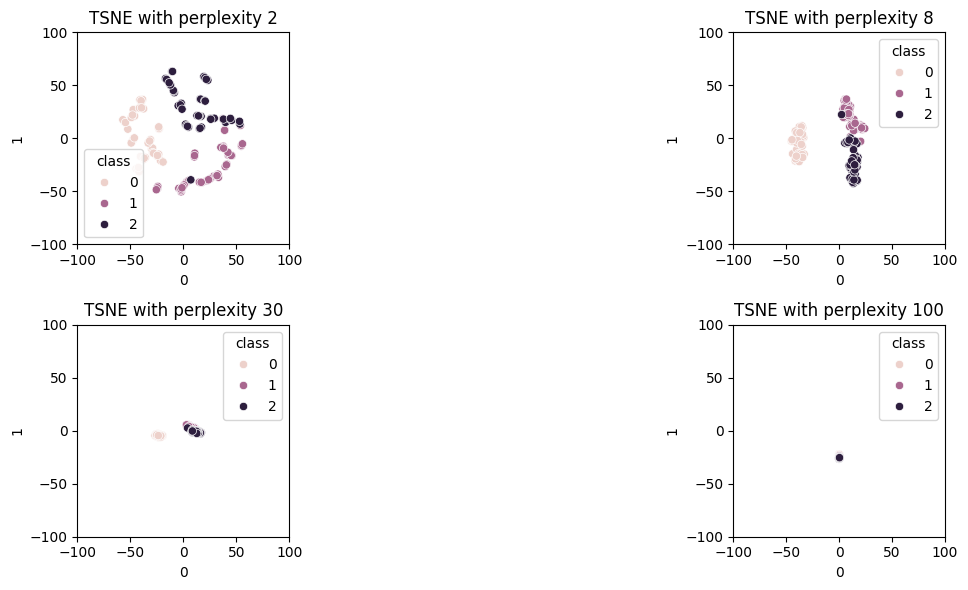

In [39]:
tsne_iris_standardized_a = TSNE(perplexity=2).fit_transform(df_standardized)

tsne_iris_standardized_a = pd.DataFrame(tsne_iris_standardized_a)
tsne_iris_standardized_a["class"] = dataset.target

tsne_iris_standardized_b = TSNE(perplexity=8).fit_transform(df_standardized)

tsne_iris_standardized_b = pd.DataFrame(tsne_iris_standardized_b)
tsne_iris_standardized_b["class"] = dataset.target

tsne_iris_standardized_c = TSNE(perplexity=30).fit_transform(df_standardized)

tsne_iris_standardized_c = pd.DataFrame(tsne_iris_standardized_c)
tsne_iris_standardized_c["class"] = dataset.target

tsne_iris_standardized_d = TSNE(perplexity=100).fit_transform(df_standardized)

tsne_iris_standardized_d = pd.DataFrame(tsne_iris_standardized_d)
tsne_iris_standardized_d["class"] = dataset.target

plot(
    tsne_iris_standardized_a,
    "TSNE with perplexity 2",
    tsne_iris_standardized_b,
    "TSNE with perplexity 8",
    tsne_iris_standardized_c,
    "TSNE with perplexity 30",
    tsne_iris_standardized_d,
    "TSNE with perplexity 100",
    (-100, 100),
    (-100, 100),
)


The lower the perplexity value the more spread out each embedded point in the cluster is. The distances between clusters are also effected, as they need to be further apart to be able to show the spread of the embedded points while maintaining separability.

### e) The number of neighbors to preserve is a key parameter in UMAP. Try the same values as previously for perplexity. Comment on similarities and differences compared to t-SNE. (2P)

d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all

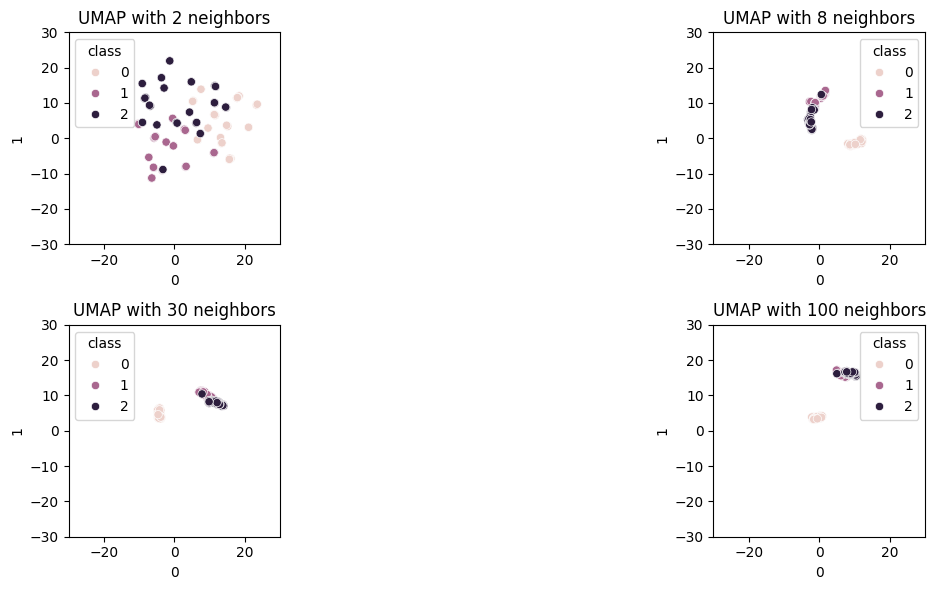

In [40]:
umap_iris_standardized_a = umap.UMAP(n_neighbors=2).fit_transform(df_standardized)


umap_iris_standardized_a = pd.DataFrame(umap_iris_standardized_a)
umap_iris_standardized_a["class"] = dataset.target

umap_iris_standardized_b = umap.UMAP(n_neighbors=8).fit_transform(df_standardized)

umap_iris_standardized_b = pd.DataFrame(umap_iris_standardized_b)
umap_iris_standardized_b["class"] = dataset.target

umap_iris_standardized_c = umap.UMAP(n_neighbors=30).fit_transform(df_standardized)

umap_iris_standardized_c = pd.DataFrame(umap_iris_standardized_c)
umap_iris_standardized_c["class"] = dataset.target

umap_iris_standardized_d = umap.UMAP(n_neighbors=100).fit_transform(df_standardized)

umap_iris_standardized_d = pd.DataFrame(umap_iris_standardized_d)
umap_iris_standardized_d["class"] = dataset.target

plot(
    umap_iris_standardized_a,
    "UMAP with 2 neighbors",
    umap_iris_standardized_b,
    "UMAP with 8 neighbors",
    umap_iris_standardized_c,
    "UMAP with 30 neighbors",
    umap_iris_standardized_d,
    "UMAP with 100 neighbors",
    (-30, 30),
    (-30, 30),
)


With a low amount of neighbors the seperability between clusters suffer when using UMAP, this could not be seen with TSNE. For higher amounts of neigbors the clusters retain similar inter-cluster distances than with TSNE. 

### f) UMAP has min_dist as an additional parameter. Illustrate its effect by trying out different settings and comment on its effect. (2P)

d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Daten von Finn\Finn\Documente\Studium\10. Semester\Visual Data Analysis\Excercises\SS25_VDA\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all

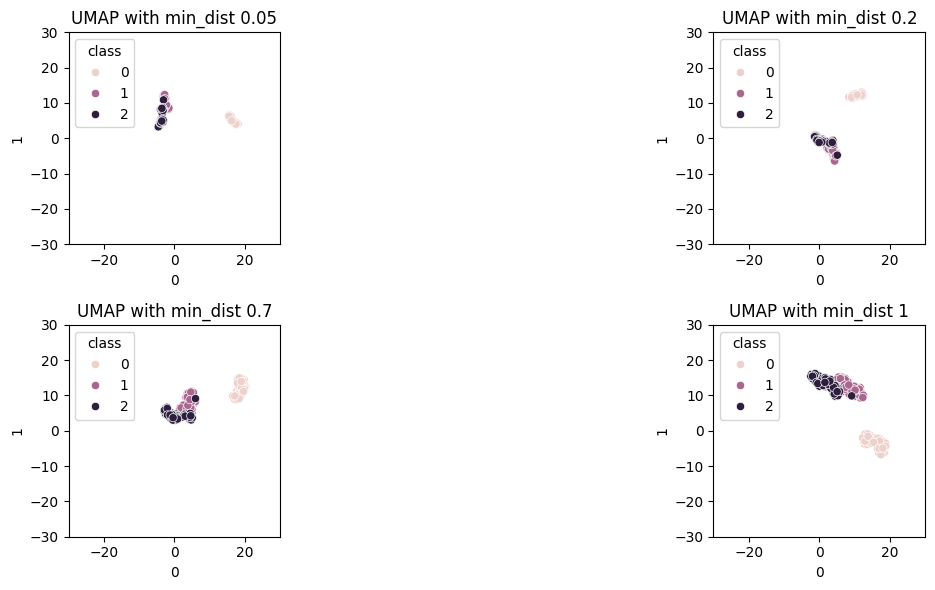

In [41]:
umap_iris_standardized_a = umap.UMAP(min_dist=0.05).fit_transform(df_standardized)


umap_iris_standardized_a = pd.DataFrame(umap_iris_standardized_a)
umap_iris_standardized_a["class"] = dataset.target

umap_iris_standardized_b = umap.UMAP(min_dist=0.2).fit_transform(df_standardized)

umap_iris_standardized_b = pd.DataFrame(umap_iris_standardized_b)
umap_iris_standardized_b["class"] = dataset.target

umap_iris_standardized_c = umap.UMAP(min_dist=0.7).fit_transform(df_standardized)

umap_iris_standardized_c = pd.DataFrame(umap_iris_standardized_c)
umap_iris_standardized_c["class"] = dataset.target

umap_iris_standardized_d = umap.UMAP(min_dist=1).fit_transform(df_standardized)

umap_iris_standardized_d = pd.DataFrame(umap_iris_standardized_d)
umap_iris_standardized_d["class"] = dataset.target

plot(
    umap_iris_standardized_a,
    "UMAP with min_dist 0.05",
    umap_iris_standardized_b,
    "UMAP with min_dist 0.2",
    umap_iris_standardized_c,
    "UMAP with min_dist 0.7",
    umap_iris_standardized_d,
    "UMAP with min_dist 1",
    (-30, 30),
    (-30, 30),
)


As the min_dist value comes closer to 1 the embedded points in the clusters get spread further apart. This has the additional effect of altering the relative positioning and rotation of the clusters.

## Task 3

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2xyz, rgb2lab
from sklearn.manifold import MDS
from skimage import io
from skimage.filters import gaussian


### a)

In [43]:
img = io.imread("canyon.png")
img_log = np.log(img + 0.001)


In [44]:
img_smooth_10 = np.log(gaussian(img, sigma=10) + 0.001)
img_smooth_100 = np.log(gaussian(img, sigma=100) + 0.001)
img_smooth_200 = np.log(gaussian(img, sigma=200) + 0.001)


In [45]:
ret_img = (
    1 / 3 * (img_log - img_smooth_10)
    + 1 / 3 * (img_log - img_smooth_100)
    + 1 / 3 * (img_log - img_smooth_200)
)
ret_img_minmax = (ret_img - np.min(ret_img)) / (np.max(ret_img) - np.min(ret_img))
ret_img_minmax = np.clip(ret_img_minmax * 255, a_min=0, a_max=255).astype(np.uint8)


In [46]:
io.imsave("canyon_retinex_minmax.png", ret_img_minmax)


In [47]:
# The function symmetrically increases the range of what is not considered an outlier until the desired percentage of outliers is reached.
def clip_most_extreme(data, clip_ratio):
    mean = data.mean()
    dif = 0
    finished = False
    while not finished:
        lower_bound = mean - dif
        upper_bound = mean + dif
        ratio_outliers = (
            np.sum(np.logical_or(ret_img < lower_bound, ret_img > upper_bound))
            / ret_img.size
        )
        if clip_ratio > ratio_outliers:
            finished = True
        else:
            dif += 0.01
    clipped_data = data.clip(mean - dif, mean + dif)
    return clipped_data


In [48]:
clip_rat = 0.05
ret_img_clipped = clip_most_extreme(ret_img, clip_rat)
ret_img_clipped_minmax = (ret_img_clipped - np.min(ret_img_clipped)) / (
    np.max(ret_img_clipped) - np.min(ret_img_clipped)
)
ret_img_clipped_minmax = np.clip(
    ret_img_clipped_minmax * 255, a_min=0, a_max=255
).astype(np.uint8)


In [49]:
io.imsave(f"canyon_retinex_clipped_minmax.png", ret_img_clipped_minmax)


## Task 4

### a)

In [50]:
def sample_triangle_random(a, b, c, num_points):
    sample_points = np.zeros((num_points, 3))
    for i in range(num_points):
        vec_1 = b - a
        vec_2 = c - a
        scaling = np.random.rand(2)
        while scaling[0] + scaling[1] > 1:
            scaling = np.random.rand(2)
        sample_points[i] = a + scaling[0] * vec_1 + scaling[1] * vec_2
    return sample_points


# Use quadratic formula to find out the value for n. This tells us the resolution of the grid. Number of points might actually be higher.
def sample_triangle_regular(vertices, num_points):
    n = int(np.ceil((-3 + np.sqrt(1 + 8 * num_points)) / 2))
    bary_coords = []
    for i in range(n + 1):
        for j in range(n + 1 - i):
            k = n - i - j
            bary_coords.append([i / n, j / n, k / n])
    bary_coords = np.array(bary_coords)
    samples = bary_coords @ vertices
    return samples


In [51]:
triangle = sample_triangle_regular(np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]), 100)


### b)

In [52]:
def scatter_3d(points):
    fig = plt.figure(figsize=(12, 5))
    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], color=points, s=10)
    ax1.set_xlabel("R")
    ax1.set_ylabel("G")
    ax1.set_zlabel("B")
    ax1.set_xlim(1, 0)
    ax1.set_ylim(1, 0)

    ax2 = fig.add_subplot(1, 2, 2)
    # Just drop on dimension
    ax2.scatter(points[:, 0], points[:, 1], color=points, s=10)

    ax1.set_title("Color Space: sRGB")
    ax2.set_title("Color Space: sRGB (2D projection)")
    ax2.axis("off")
    plt.show()


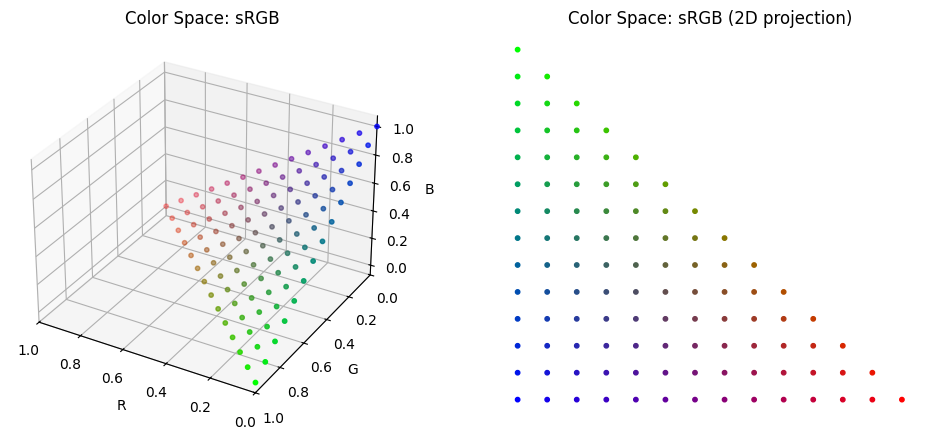

In [53]:
scatter_3d(triangle)


### c)

In [54]:
tri_xyz = rgb2xyz(triangle)
tri_lab = rgb2lab(triangle)


In [55]:
def scatter_variants(points_xyz, points_lab, colors):
    fig = plt.figure(figsize=(12, 5))
    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.scatter(
        points_xyz[:, 0], points_xyz[:, 1], points_xyz[:, 2], color=colors, s=10
    )
    ax1.set_xlabel("x")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")
    ax1.view_init(azim=20)
    ax1.set_title("Color Space: XYZ")

    ax2 = fig.add_subplot(1, 2, 2, projection="3d")
    ax2.scatter(
        points_lab[:, 0], points_lab[:, 1], points_lab[:, 2], color=colors, s=10
    )
    ax2.set_xlabel("L")
    ax2.set_ylabel("a")
    ax2.set_zlabel("b")
    ax2.view_init(elev=30, azim=240)
    ax2.set_title("Color Space: Lab")

    plt.show()


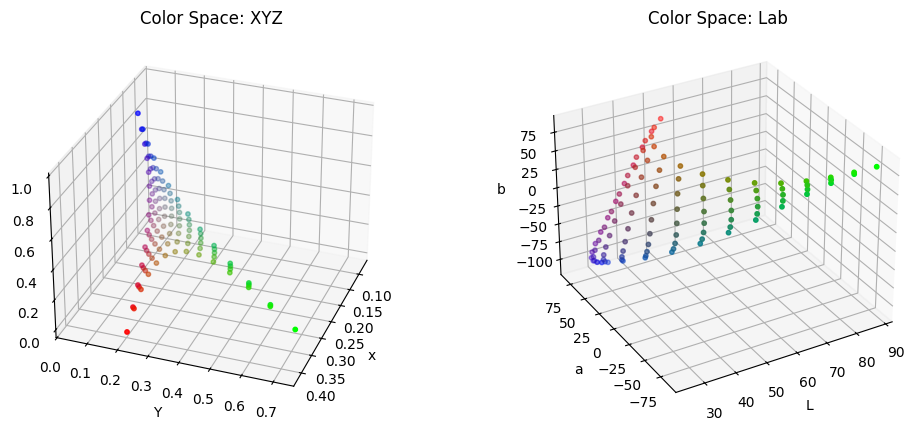

In [56]:
scatter_variants(tri_xyz, tri_lab, triangle)


Since the Y-Axis in CIE XYZ stands for luminance and the L-axis in CIE Lab for lightness we can see that in both representations the green primary is the brightest and blue the darkest.

### d)

In [57]:
srgb_mds = MDS()
xyz_mds = MDS()
lab_mds = MDS()


In [58]:
srgb_mds_points = srgb_mds.fit_transform(triangle)
xyz_mds_points = xyz_mds.fit_transform(tri_xyz)
lab_mds_points = lab_mds.fit_transform(tri_lab)


In [59]:
def scatter_mds(srgb_points, xyz_points, lab_points, colors):
    fig = plt.figure(figsize=(12, 5))
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.scatter(srgb_points[:, 0], srgb_points[:, 1], color=colors, s=10)
    ax1.set_title("Color Space: sRGB")

    ax2 = fig.add_subplot(1, 3, 2)
    ax2.scatter(xyz_points[:, 0], xyz_points[:, 1], color=colors, s=10)
    ax2.set_title("Color Space: XYZ")

    ax3 = fig.add_subplot(1, 3, 3)
    ax3.scatter(lab_points[:, 0], lab_points[:, 1], color=colors, s=10)
    ax3.set_title("Color Space: Lab")

    plt.show()


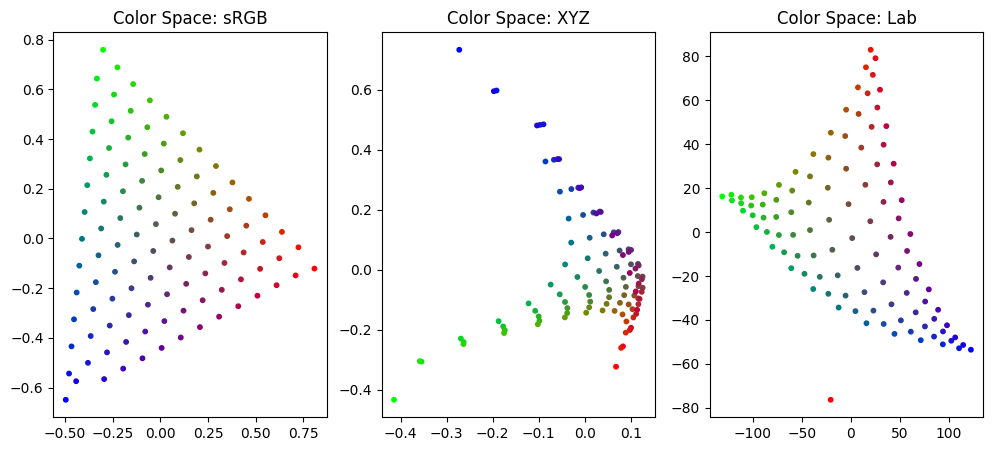

In [60]:
scatter_mds(srgb_mds_points, xyz_mds_points, lab_mds_points, triangle)


We see that the underlying structure of the points from 3D gets mostly preserved in all of the multidimensional scalings.
However, the colors in XYZ are often grouped together even though they are not perceptually similar.
In sRGB on the other hand colors are never grouped together even if some are more similar to their neighbors than others.
The Lab colorspace looks  best here since colors that are perceptually similar are also close in the plot while different ones remain their distance.